In [1]:
from quantrocket.license import set_license

In [2]:
from quantrocket.history import drop_db
drop_db("usstock-free-1d", confirm_by_typing_db_code_again="usstock-free-1d")

{'status': 'deleted quantrocket.v2.history.usstock-free-1d.sqlite'}

In [3]:
set_license("7e0fc4b6-deed-11ee-bdbc-e55510e7a339")

{'licensekey': '7e0f........a339', 'software_license': {}}

In [4]:
from quantrocket.license import get_license_profile
get_license_profile(force_refresh=True)

{'licensekey': '7e0f........a339', 'software_license': {}}

In [ ]:
!quantrocket license get --force-refresh

**Getting the dataset and preprocessing**

In [6]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", bar_size="1 day", free=True)

{'status': 'successfully created quantrocket.v2.history.usstock-free-1d.sqlite'}

In [7]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [8]:
from quantrocket.master import get_securities
securities = get_securities(vendors="usstock", sec_types="STK")
securities.head()

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BKZB36,HD,XNYS,US,USD,STK,False,America/New_York,HOME DEPOT INC,1,1,False,NaT,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000BPH459,MSFT,XNAS,US,USD,STK,False,America/New_York,MICROSOFT CORP,1,1,False,NaT,NaT,NaT


In [21]:
filtered_securities = securities[securities.Delisted==False]
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities.head()

,Symbol,Exchange,Name,Delisted
Sid,,,,
FIBBG000B9XRY4,AAPL,XNAS,APPLE INC,False
FIBBG000BKZB36,HD,XNYS,HOME DEPOT INC,False
FIBBG000BMHYD1,JNJ,XNYS,JOHNSON & JOHNSON,False
FIBBG000BPH459,MSFT,XNAS,MICROSOFT CORP,False
FIBBG000GZQ728,XOM,XNYS,EXXON MOBIL CORP,False


In [22]:
import pandas as pd

In [23]:
from quantrocket import get_prices

In [24]:
prices = get_prices("usstock-free-1d", universes="usstock-free", start_date="2023-01-01", fields=["Close"])
prices.head()

Sid               FIBBG000B9XRY4  FIBBG000BKZB36  FIBBG000BMHYD1  \
Field Date                                                         
Close 2023-01-03        124.2163        305.5299        171.6388   
      2023-01-04        125.4975        309.2243        173.5075   
      2023-01-05        124.1666        305.1043        172.2264   
      2023-01-06        128.7352        307.0966        173.6231   
      2023-01-09        129.2616        307.3674        169.1248   

Sid               FIBBG000BPH459  FIBBG000GZQ728  FIBBG00B3T3HD3  
Field Date                                                        
Close 2023-01-03        237.0360        102.0452         43.8958  
      2023-01-04        226.6673        102.3422         44.4374  
      2023-01-05        219.9494        104.6320         44.7919  
      2023-01-06        222.5416        105.8967         45.6485  
      2023-01-09        224.7083        103.9230         49.4985

In [25]:
closes = prices.loc["Close"]

MOMENTUM_WINDOW = 252 # 12 months = 252 trading days
RANKING_PERIOD_GAP = 22 # 1 month = 22 trading days
earlier_closes = closes.shift(MOMENTUM_WINDOW)
later_closes = closes.shift(RANKING_PERIOD_GAP)
momentum_returns = (later_closes - earlier_closes) / earlier_closes

In [26]:
next_day_returns = closes.pct_change().shift(-1)

In [27]:
momentum_returns = momentum_returns.stack(dropna=False)
next_day_returns = next_day_returns.stack(dropna=False)

In [28]:
num_bins = 2
bins = pd.qcut(momentum_returns, num_bins)

<AxesSubplot:title={'center':'Next-day return by 12-month momentum bin'}>

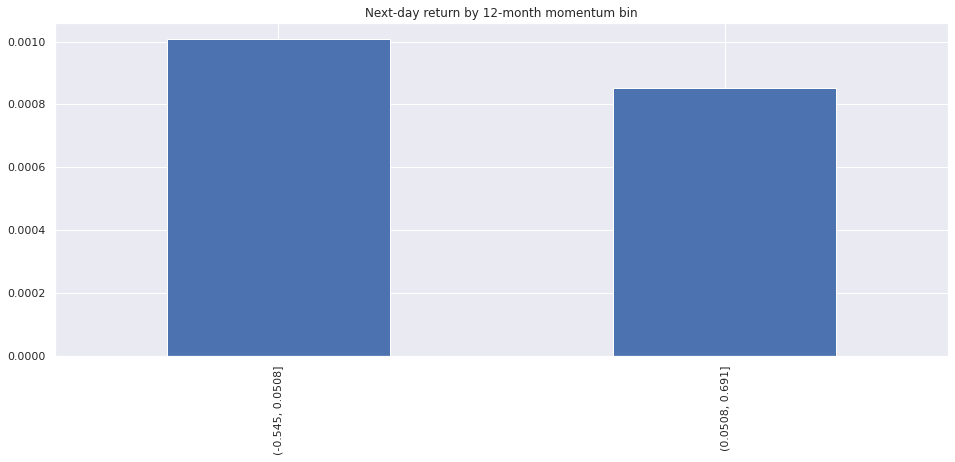

In [29]:
next_day_returns.groupby(bins).mean().plot(kind="bar", title="Next-day return by 12-month momentum bin")

**Getting only Apple stock (symbol=‘AAPL’) for the year 2023 (01-01-2023 to 12-31-2023)**

In [72]:
prices = get_prices("usstock-free-1d", sids="FIBBG000B9XRY4", start_date="2023-01-01", end_date="2023-12-31", fields=["Close"])

In [74]:
prices.head()

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03        124.2163
      2023-01-04        125.4975
      2023-01-05        124.1666
      2023-01-06        128.7352
      2023-01-09        129.2616

In [75]:
df = pd.DataFrame(prices)

In [76]:
df = df.to_csv('stock_prices.csv', index=False)

In [79]:
pricesss = prices["FIBBG000B9XRY4"]["Close"]
#pricesss['Date'] = pricesss.index
pricesss.to_csv('stock_prices.csv')

In [80]:
df = pd.read_csv('stock_prices.csv')

In [81]:
print(df)

           Date  FIBBG000B9XRY4
0    2023-01-03        124.2163
1    2023-01-04        125.4975
2    2023-01-05        124.1666
3    2023-01-06        128.7352
4    2023-01-09        129.2616
..          ...             ...
245  2023-12-22        193.3533
246  2023-12-26        192.8040
247  2023-12-27        192.9038
248  2023-12-28        193.3333
249  2023-12-29        192.2846

[250 rows x 2 columns]


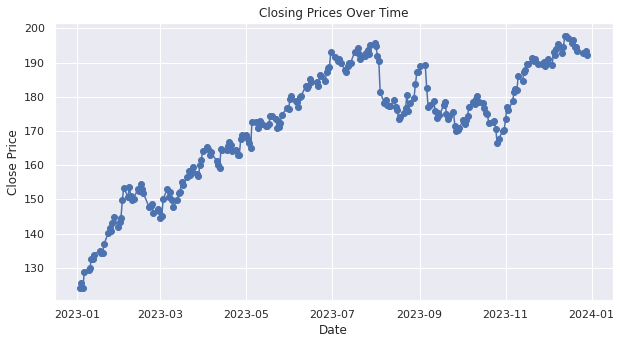

In [84]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])


plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df["FIBBG000B9XRY4"], marker='o', linestyle='-', color='b')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [45]:
pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [91]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['FIBBG000B9XRY4'],
                high=df['FIBBG000B9XRY4'],
                low=df['FIBBG000B9XRY4'],
                close=df['FIBBG000B9XRY4'])])

fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Close Price')
fig.show()

In [92]:
prices['Returns'] = prices['FIBBG000B9XRY4']['Close'].pct_change()

def decide_buy_order(returns):
    if returns > 0:
        return "Place buy order"
    else:
        return "Do not place buy order"

prices['Decision'] = prices['Returns'].apply(decide_buy_order)

print(prices)

Sid               FIBBG000B9XRY4  Returns                Decision
Field Date                                                       
Close 2023-01-03        124.2163      NaN  Do not place buy order
      2023-01-04        125.4975      NaN  Do not place buy order
      2023-01-05        124.1666      NaN  Do not place buy order
      2023-01-06        128.7352      NaN  Do not place buy order
      2023-01-09        129.2616      NaN  Do not place buy order
...                          ...      ...                     ...
      2023-12-22        193.3533      NaN  Do not place buy order
      2023-12-26        192.8040      NaN  Do not place buy order
      2023-12-27        192.9038      NaN  Do not place buy order
      2023-12-28        193.3333      NaN  Do not place buy order
      2023-12-29        192.2846      NaN  Do not place buy order

[250 rows x 3 columns]


In [93]:
prices['Returns'] = prices['FIBBG000B9XRY4']['Close'].pct_change()

prices['Buy_Signal'] = prices['Returns'] > 0

prices['Position'] = 0

prices.loc[prices['Buy_Signal'], 'Position'] = 1

prices['Position'] = prices['Position'].shift(1)

initial_investment = 100000

prices['Portfolio_Value'] = initial_investment * (1 + prices['Returns']).cumprod()

print(prices[['FIBBG000B9XRY4', 'Returns', 'Buy_Signal', 'Position', 'Portfolio_Value']])

Sid               FIBBG000B9XRY4  Returns  Buy_Signal  Position  \
Field Date                                                        
Close 2023-01-03        124.2163      NaN       False       NaN   
      2023-01-04        125.4975      NaN       False       0.0   
      2023-01-05        124.1666      NaN       False       0.0   
      2023-01-06        128.7352      NaN       False       0.0   
      2023-01-09        129.2616      NaN       False       0.0   
...                          ...      ...         ...       ...   
      2023-12-22        193.3533      NaN       False       0.0   
      2023-12-26        192.8040      NaN       False       0.0   
      2023-12-27        192.9038      NaN       False       0.0   
      2023-12-28        193.3333      NaN       False       0.0   
      2023-12-29        192.2846      NaN       False       0.0   

Sid               Portfolio_Value  
Field Date                         
Close 2023-01-03              NaN  
      2023-01-04    

In [94]:
def maximize_portfolio_value(prices):
    portfolio_value = 100000  
    portfolio_shares = 0  

    for i in range(len(prices) - 1):
        current_price = prices[i]
        next_price = prices[i + 1]
        returns = (next_price - current_price) / current_price

        if returns > 0:
            shares_to_buy = portfolio_value * returns / current_price
            portfolio_shares += shares_to_buy
            portfolio_value -= shares_to_buy * current_price

    return portfolio_value


In [95]:
df = pd.read_csv('stock_prices.csv')
maximize_portfolio_value(df['FIBBG000B9XRY4'])

23380.46724968913

In [96]:
import numpy as np

**Calculating Portfolio Value , Transition Porbability Matrix and Optimal buy indices**

In [97]:


def calculate_returns(price_history):
    returns = np.diff(price_history) / price_history[:-1]
    return returns

def classify_state(returns):
    states = np.zeros(len(returns))
    states[returns >= 0.01] = 1
    states[(returns > -0.01) & (returns < 0.01)] = 0
    states[returns <= -0.01] = -1
    return states

def calculate_transition_distribution(states):
    transition_matrix = np.zeros((3, 3))

    for i in range(1, len(states)):
        current_state = int(states[i-1] + 1)
        next_state = int(states[i] + 1)
        transition_matrix[current_state, next_state] += 1

    transition_distribution = transition_matrix / np.sum(transition_matrix, axis=1, keepdims=True)
    return transition_distribution

def maximize_portfolio_value(price_history):
    returns = calculate_returns(price_history)
    states = classify_state(returns)
    portfolio_value = 0
    states = list(states)
    states.insert(0, 1)
    returns = list(returns)
    returns.insert(0, 0)
    df["States"] = list(states)
    df["Returns"] = list(returns)

    Value = [0]

    for i in range(1, len(states)):
        if states[i] == 1 and states[i-1] == 0:
            portfolio_value += 1
            Value.append(portfolio_value)
        elif states[i] == -1 and states[i-1] == 0:
            portfolio_value -= 1
            Value.append(portfolio_value)
        else:
          Value.append(portfolio_value)

    df["Value"] = Value

    return portfolio_value


price_history = list(df["FIBBG000B9XRY4"])

final_portfolio_value = maximize_portfolio_value(price_history)
print("Final Portfolio Value:", final_portfolio_value)

transition_distribution = calculate_transition_distribution(classify_state(calculate_returns(price_history)))
print("Transition Distribution:")
print(transition_distribution)



Final Portfolio Value: 17
Transition Distribution:
[[0.14285714 0.74285714 0.11428571]
 [0.14649682 0.59872611 0.25477707]
 [0.125      0.67857143 0.19642857]]


In [98]:
def calculate_returns(price_history):
    returns = np.diff(price_history) / price_history[:-1]
    return returns
def state_classification(returns):
    states = np.zeros(len(returns))
    for i in range(0, len(returns)):
        if returns[i] >= 0.01:
            states[i] = 1
        elif returns[i] > -0.01:
            states[i] = 0
        else :
            states[i] = -1
    return states

def value_function(states):
    portfolio_value = 0
    optimal_buy_indices = []
    for i in range(1, len(states)):
        if states[i] == 1 and states[i-1] == 0:
            portfolio_value += 1
            optimal_buy_indices.append(i)
        elif states[i] == -1 and states[i-1] == 0:
            portfolio_value -= 1
    return portfolio_value, optimal_buy_indices


price_history = np.array(df["FIBBG000B9XRY4"])
returns = calculate_returns(price_history)
states = state_classification(returns)
portfolio_value, optimal_buy_indices = value_function(states)
print("Optimal Buy Indices:", optimal_buy_indices)


Optimal Buy Indices: [5, 7, 11, 15, 20, 27, 29, 40, 49, 51, 58, 60, 68, 78, 84, 87, 93, 99, 102, 107, 109, 112, 116, 119, 122, 132, 141, 159, 163, 176, 186, 190, 206, 208, 211, 215, 217, 231, 233, 237]


**Time Series Model**

In [99]:
from statsmodels.tsa.arima.model import ARIMA

time_series_data = prices['FIBBG000B9XRY4']['Close']

model = ARIMA(time_series_data, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         FIBBG000B9XRY4   No. Observations:                  250
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -539.139
Date:                Tue, 12 Mar 2024   AIC                           1090.278
Time:                        15:29:58   BIC                           1111.383
Sample:                             0   HQIC                          1098.773
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0781      0.065      1.193      0.233      -0.050       0.206
ar.L2         -0.0056      0.070     -0.080      0.936      -0.142       0.131
ar.L3          0.0874      0.068      1.289      0.1

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [100]:
prices = get_prices("usstock-free-1d", sids="FIBBG000B9XRY4", start_date="2023-01-01", end_date="2023-12-31", fields=["Close"])

In [101]:
prices.head()

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03        124.2163
      2023-01-04        125.4975
      2023-01-05        124.1666
      2023-01-06        128.7352
      2023-01-09        129.2616

In [102]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(df["FIBBG000B9XRY4"], order=(5, 1, 0))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=30)

# Calculate portfolio value based on forecasted values
portfolio_value = np.sum(forecast)
print("Forecasted Values:")
print(forecast)
print("\nPortfolio Value based on Forecasted Values:")
print(portfolio_value)

Forecasted Values:
250    192.286329
251    192.359693
252    192.257119
253    192.249773
254    192.317910
255    192.312368
256    192.309157
257    192.321119
258    192.320316
259    192.316031
260    192.317154
261    192.317085
262    192.316014
263    192.316184
264    192.316421
265    192.316281
266    192.316314
267    192.316397
268    192.316375
269    192.316365
270    192.316379
271    192.316375
272    192.316369
273    192.316371
274    192.316371
275    192.316370
276    192.316371
277    192.316371
278    192.316371
279    192.316371
Name: predicted_mean, dtype: float64

Portfolio Value based on Forecasted Values:
5769.378125107039


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: DeprecationWarning:

No supported index is available. In the 

**Forecasting Using ARIMA**

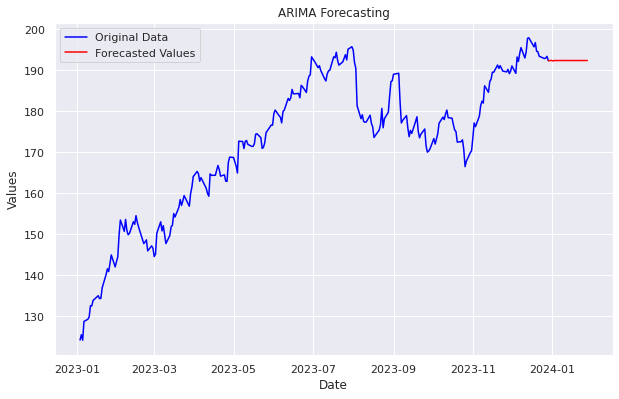

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df.index, df["FIBBG000B9XRY4"], label='Original Data', color='blue')

forecast_index = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]
plt.plot(df.index[-1:].append(forecast_index), df["FIBBG000B9XRY4"].iloc[-1:].append(forecast), label='Forecasted Values', color='red')

plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

**Forecasting Values using LinearRegression**

In [114]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime, timedelta
import numpy as np

In [120]:
df = pd.read_csv('stock_prices.csv')
df.rename(columns={'FIBBG000B9XRY4': 'close price'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfYear'] = df['Date'].dt.dayofyear

n = 15


X = df[['DayOfYear']]
y = df['close price']


poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

last_day = df['Date'].iloc[-1]

def add_trading_days(start_date, num_days):
    trading_days = []
    while len(trading_days) < num_days:
        start_date += timedelta(days=1)
        if start_date.weekday() < 5: 
            trading_days.append(start_date)
    return trading_days

new_dates = add_trading_days(last_day, n)
new_day_of_year = [(date.timetuple().tm_yday) for date in new_dates]
new_X_poly = poly.transform(np.array(new_day_of_year).reshape(-1, 1))

predictions = model.predict(new_X_poly)


predictions_df = pd.DataFrame({'Date': new_dates, 'Predicted Close Price': predictions})
print(predictions_df)

         Date  Predicted Close Price
0  2024-01-01             122.111790
1  2024-01-02             122.818875
2  2024-01-03             123.520069
3  2024-01-04             124.215399
4  2024-01-05             124.904890
5  2024-01-08             126.938582
6  2024-01-09             127.604971
7  2024-01-10             128.265648
8  2024-01-11             128.920637
9  2024-01-12             129.569966
10 2024-01-15             131.484239
11 2024-01-16             132.111177
12 2024-01-17             132.732581
13 2024-01-18             133.348476
14 2024-01-19             133.958888


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



**Finding the optimal Buy Indices and portfolio value after forecasting**

In [121]:
def classify_state(returns):
    states = np.where(returns >= 0.01, 1, np.where(returns > -0.01, 0, -1))
    return states

def calculate_transition_probabilities(states):
    transitions = np.zeros((3, 3))  # 3x3 matrix for state transitions
    for i in range(1, len(states)):
        transitions[states[i-1] + 1, states[i] + 1] += 1
    
    row_sums = transitions.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1
    probabilities = transitions / row_sums
    return probabilities


def calculate_value_function_and_decisions(states):
    V = [0] 
    buy_indices = []
    for i in range(1, len(states)):
        if states[i] == 1 and states[i-1] == 0:
            V.append(V[-1] + 1)
            buy_indices.append(i) 
        elif states[i] == -1 and states[i-1] == 0:
            V.append(V[-1] - 1)
        else:
            V.append(V[-1])
    return V, buy_indices

def print_transition_probabilities_with_labels(probabilities):
    state_labels = ['Bear', 'Flat', 'Bull']  
    print("Transition Probabilities Matrix:")
    print("From To", end="\t")
    for label in state_labels:
        print(label, end="\t")
    print()  
    for i, row in enumerate(probabilities):
        print(state_labels[i], end="\t")
        for prob in row:
            print(f"{prob:.2f}", end="\t") 
        print() 

df.sort_values('Date', inplace=True)

predictions_df.loc[:, 'Daily Returns'] = predictions_df['Predicted Close Price'].pct_change()
returns = predictions_df['Daily Returns']
states = classify_state(returns)
transition_probabilities = calculate_transition_probabilities(states)
V, buy_indices = calculate_value_function_and_decisions(states)

print(f"Final portfolio value: V(N) = {V[-1]}")
print()
print(f"Optimal buy indices: {buy_indices}")
print()

print_transition_probabilities_with_labels(transition_probabilities)

Final portfolio value: V(N) = 2

Optimal buy indices: [5, 10]

Transition Probabilities Matrix:
From To	Bear	Flat	Bull	
Bear	0.00	1.00	0.00	
Flat	0.00	0.82	0.18	
Bull	0.00	1.00	0.00	
